In [4]:
%matplotlib inline
import pandas as pd

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [7]:
release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
3,#Horror,2015,USA,2015-11-20
4,#Lucky Number,2015,USA,2015-09-01


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [132]:
h=release_dates

In [178]:
t = h[h.title.str.contains('Christmas')&(h.country=='USA')]
t.head()

,title,year,country,date
1104,12 Dog Days of Christmas,2014,USA,2014-11-28
1105,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5590,A Belle for Christmas,2014,USA,2014-11-04
5819,A Cadaver Christmas,2011,USA,2011-04-02
5921,A Christmas Blessing,2013,USA,2013-12-07


In [216]:
g = t.groupby([pd.DatetimeIndex(t.date).month]).size()


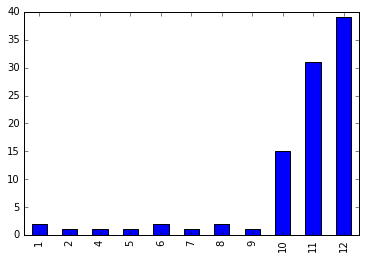

In [220]:
g.plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

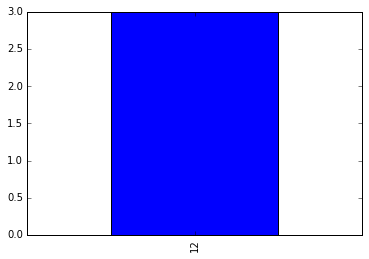

In [225]:
h=release_dates
t = h[h.title.str.contains('The Hobbit')&(h.country=='USA')]
g = t.groupby([pd.DatetimeIndex(t.date).month]).size()
g.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [256]:
def weekday(s):
    days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    list = []
    for i in range(len(s)):
        list.append(days[s[i]])
    return list

In [265]:
import numpy as np
weekday(pd.DatetimeIndex(t.date).dayofweek)


['Friday', 'Wednesday', 'Friday']

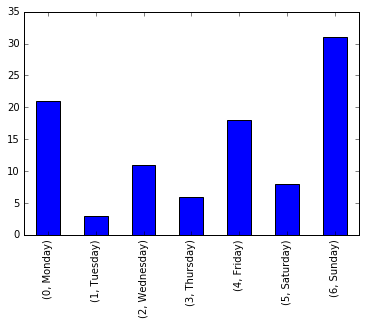

In [275]:
h=release_dates
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
t = h[h.title.str.contains('Romance')&(h.country=='USA')]
g = t.groupby([pd.DatetimeIndex(t.date).dayofweek,weekday(pd.DatetimeIndex(t.date).dayofweek)]).size()
g.plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [ ]:
def weekday(s):
    days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    list = []
    for i in range(len(s)):
        list.append(days[s[i]])
    return list

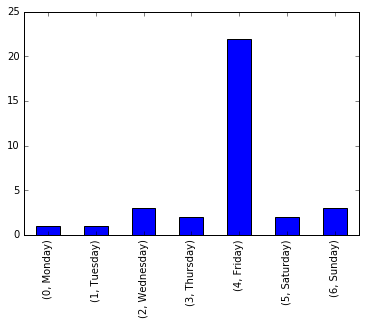

In [276]:
h=release_dates
t = h[h.title.str.contains('Action')&(h.country=='USA')]
g = t.groupby([pd.DatetimeIndex(t.date).dayofweek,weekday(pd.DatetimeIndex(t.date).dayofweek)]).size()
g.plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [314]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
c = c[c.year // 10 * 10 == 1990]
c.merge(usa).sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [325]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Judi Dench']
g = c.merge(usa).sort_values('date')


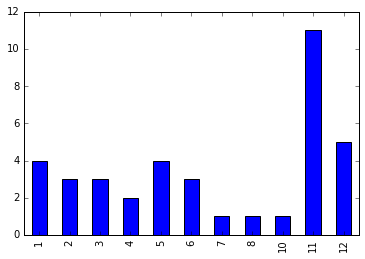

In [326]:

f = g.groupby([pd.DatetimeIndex(g.date).month]).size()
f.plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [329]:
usa = release_dates[release_dates.country == 'USA']

c = cast
c = c[c.name == 'Tom Cruise']
g = c.merge(usa).sort_values('date')

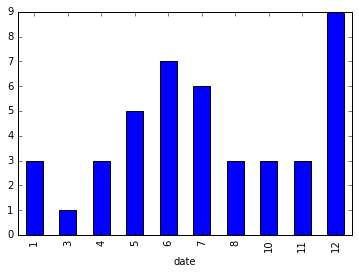

In [331]:

f = g.groupby([g.date.dt.month]).size()
f.plot(kind='bar')